<a href="https://colab.research.google.com/github/SwathiJakka/SwathiJakka.github.io/blob/main/capstone_Eval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

base_path = "/content/drive/MyDrive/Colab Notebooks/capstone/"

contents = os.listdir(base_path)

folders = [item for item in contents if os.path.isdir(os.path.join(base_path, item))]
if folders:
    print("Folders in capstone:")
    for folder in folders:
        print("\nFiles in folder '{}':".format(folder))
        folder_path = os.path.join(base_path, folder)
        folder_contents = os.listdir(folder_path)
        for item in folder_contents:
            print(os.path.join(folder, item))
else:
    print("No folders found in capstone.")


Folders in capstone:

Files in folder 'ASCEND-data-July-Sep 2023':
ASCEND-data-July-Sep 2023/Assessments Report Exams-July -2023.csv
ASCEND-data-July-Sep 2023/Assessments Report-Survey-July-2023.csv
ASCEND-data-July-Sep 2023/Evaluation-Report-July-2023.csv
ASCEND-data-July-Sep 2023/Signup Report-July-2023.csv

Files in folder 'ASCEND Data Jan - Mar 2024':
ASCEND Data Jan - Mar 2024/Evaluation-Report-2024.csv
ASCEND Data Jan - Mar 2024/Assessments Report-Survey2024.csv
ASCEND Data Jan - Mar 2024/Assessments Report Exams-2024.csv
ASCEND Data Jan - Mar 2024/Signup Report2024.csv

Files in folder 'ASCEND Data Oct - Dec 2023':
ASCEND Data Oct - Dec 2023/Assessments Report Exams-Oct-2023.csv
ASCEND Data Oct - Dec 2023/Signup Report-Oct-2023.csv
ASCEND Data Oct - Dec 2023/Assessments Report-Survey-Oct-2023.csv
ASCEND Data Oct - Dec 2023/Evaluation-Report-Oct-2023.csv


In [ ]:
df_EvalJan24 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/capstone/ASCEND Data Jan - Mar 2024/Evaluation-Report-2024.csv",encoding='utf8')

In [ ]:
df_EvalJuly23 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/capstone/ASCEND-data-July-Sep 2023/Evaluation-Report-July-2023.csv",encoding='utf8')

In [ ]:
df_EvalOct23 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/capstone/ASCEND Data Oct - Dec 2023/Evaluation-Report-Oct-2023.csv",encoding='utf8')

In [ ]:
df_EvalJan24.columns

Index(['Username', 'Course Name', 'Eval Question', 'Eval Response',
       'Eval Rating', 'Eval Response DateAdded', 'Cohort Name',
       'Program Version', 'Gender', 'Age', 'Status in Canada',
       'Marital Status', 'Country of Birth',
       'Country you have_will immigrate from',
       'Year landed in Canada _enter 0 if not yet landed_',
       'Highest level of education', 'Country', 'Province', 'City',
       'What is your current employment status',
       'What industry or sector are you working in',
       'Is this your preferred industry or sector',
       'What is your current annual employment salary', 'FirstName',
       'LastName', 'Phone', 'Genre', ' Âge', 'Statut au Canada',
       'Situation maritale', 'Pays de naissance',
       'Pays d_où vous avez immigré_immigrerez',
       'Année d_arrivée au Canada _saisir 0 si non applicable_',
       'Plus haut niveau de formation',
       'Quelle est votre situation professionnelle actuelle',
       'Dans quelle industrie o

In [ ]:
df_EvalJuly23.columns

Index(['Username', 'Course Name', 'Eval Question', 'Eval Response',
       'Eval Rating', 'Eval Response DateAdded', 'Cohort Name',
       'Program Version', 'Gender', 'Age', 'Status in Canada',
       'Marital Status', 'Country of Birth',
       'Country you have_will immigrate from',
       'Year landed in Canada _enter 0 if not yet landed_',
       'Highest level of education', 'Country', 'Province', 'City',
       'What is your current employment status',
       'What industry or sector are you working in',
       'Is this your preferred industry or sector',
       'What is your current annual employment salary', 'FirstName',
       'LastName', 'Phone', 'Genre', ' Âge', 'Statut au Canada',
       'Situation maritale', 'Pays de naissance',
       'Pays d_où vous avez immigré_immigrerez',
       'Année d_arrivée au Canada _saisir 0 si non applicable_',
       'Plus haut niveau de formation',
       'Quelle est votre situation professionnelle actuelle',
       'Dans quelle industrie o

In [ ]:
df_EvalOct23.columns

Index(['Username', 'Course Name', 'Eval Question', 'Eval Response',
       'Eval Rating', 'Eval Response DateAdded', 'Cohort Name',
       'Program Version', 'Gender', 'Age', 'Status in Canada',
       'Marital Status', 'Country of Birth',
       'Country you have_will immigrate from',
       'Year landed in Canada _enter 0 if not yet landed_',
       'Highest level of education', 'Country', 'Province', 'City',
       'What is your current employment status',
       'What industry or sector are you working in',
       'Is this your preferred industry or sector',
       'What is your current annual employment salary', 'FirstName',
       'LastName', 'Phone', 'Genre', ' Âge', 'Statut au Canada',
       'Situation maritale', 'Pays de naissance',
       'Pays d_où vous avez immigré_immigrerez',
       'Année d_arrivée au Canada _saisir 0 si non applicable_',
       'Plus haut niveau de formation',
       'Quelle est votre situation professionnelle actuelle',
       'Dans quelle industrie o

In [ ]:
df_EvalJan24['Quarterly'] = 'Jan 2024 - Mar 2024'

print(df_EvalJan24.head())

            Username                                        Course Name  \
0  10049na@gmail.com  Module 1: The value of your existing skills an...   
1  10049na@gmail.com  Module 1: The value of your existing skills an...   
2  10049na@gmail.com  Module 1: The value of your existing skills an...   
3  10049na@gmail.com  Module 1: The value of your existing skills an...   
4  10049na@gmail.com  Module 1: The value of your existing skills an...   

                                       Eval Question          Eval Response  \
0      1. What is your overall rating for Module 1?                     NaN   
1       3. What was your favourite part of Module 1?  7 Transferable skills   
2  2. If 1 star = 1 hour, how many hours did it t...                    NaN   
3  5. Please share any additional comments on Mod...                    NaN   
4                   4. What would improve Module 1?                     NaN   

   Eval Rating Eval Response DateAdded            Cohort Name Program Vers

In [ ]:
num_columns = df_EvalJan24.shape[1]
print("Number of columns:", num_columns)


Number of columns: 39


In [ ]:
df_EvalJuly23['Quarterly'] = 'July 2023 - Sep 2023'

print(df_EvalJuly23.head())

              Username                                        Course Name  \
0  13818113817@163.com  Module 3: Developing your professional communi...   
1  13818113817@163.com  Module 3: Developing your professional communi...   
2  13818113817@163.com  Module 3: Developing your professional communi...   
3  13818113817@163.com  Module 3: Developing your professional communi...   
4  13818113817@163.com  Module 3: Developing your professional communi...   

                                       Eval Question  \
0  5. Please share any additional comments on Mod...   
1                   4. What would improve Module 3?    
2      1. What is your overall rating for Module 3?    
3  2. If 1 star = 1 hour, how many hours did it t...   
4       3. What was your favourite part of Module 3?   

                                      Eval Response  Eval Rating  \
0  more graphical content instead of a lot of words            0   
1                          Less content for reading            0

In [ ]:
num_columns = df_EvalJuly23.shape[1]
print("Number of columns:", num_columns)


Number of columns: 39


In [ ]:
df_EvalOct23['Quarterly'] = 'Oct 2023 - Dec 2023'

print(df_EvalOct23.head())

                Username                                        Course Name  \
0  0503587987e@gmail.com  Module 1: The value of your existing skills an...   
1  0503587987e@gmail.com  Module 1: The value of your existing skills an...   
2  0503587987e@gmail.com  Module 1: The value of your existing skills an...   
3  0503587987e@gmail.com  Module 1: The value of your existing skills an...   
4  0503587987e@gmail.com  Module 1: The value of your existing skills an...   

                                       Eval Question Eval Response  \
0      1. What is your overall rating for Module 1?            NaN   
1       3. What was your favourite part of Module 1?   versatility   
2  2. If 1 star = 1 hour, how many hours did it t...           NaN   
3  5. Please share any additional comments on Mod...   I loved it.   
4                   4. What would improve Module 1?       all good   

   Eval Rating Eval Response DateAdded          Cohort Name Program Version  \
0            5         20

In [ ]:
num_columns = df_EvalOct23.shape[1]
print("Number of columns:", num_columns)


Number of columns: 39


In [ ]:
df_Eval = pd.concat([df_EvalJan24, df_EvalJuly23, df_EvalOct23], ignore_index=True)

In [ ]:
df_Eval.to_csv('data_Eval.csv', index=False)

In [ ]:
print(df_Eval.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 39 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Username                                                18835 non-null  object 
 1   Course Name                                             18835 non-null  object 
 2   Eval Question                                           18835 non-null  object 
 3   Eval Response                                           5349 non-null   object 
 4   Eval Rating                                             18835 non-null  int64  
 5   Eval Response DateAdded                                 18835 non-null  object 
 6   Cohort Name                                             18830 non-null  object 
 7   Program Version                                         18830 non-null  object 
 8   Gender                              

In [ ]:
print(df_Eval.dtypes)

Username                                                   object
Course Name                                                object
Eval Question                                              object
Eval Response                                              object
Eval Rating                                                 int64
Eval Response DateAdded                                    object
Cohort Name                                                object
Program Version                                            object
Gender                                                     object
Age                                                        object
Status in Canada                                           object
Marital Status                                             object
Country of Birth                                           object
Country you have_will immigrate from                       object
Year landed in Canada _enter 0 if not yet landed_         float64
Highest le

In [ ]:
print(df_Eval.isnull().sum())

Username                                                      0
Course Name                                                   0
Eval Question                                                 0
Eval Response                                             13486
Eval Rating                                                   0
Eval Response DateAdded                                       0
Cohort Name                                                   5
Program Version                                               5
Gender                                                      950
Age                                                         950
Status in Canada                                            950
Marital Status                                              950
Country of Birth                                            950
Country you have_will immigrate from                       1040
Year landed in Canada _enter 0 if not yet landed_           950
Highest level of education              

**Count of Ratings**

In [ ]:
rating_counts = df_Eval['Eval Rating'].value_counts()
print(rating_counts)

Eval Rating
0    12639
5     3381
4      901
2      729
3      641
1      544
Name: count, dtype: int64


In [ ]:
df_Eval.head()

,Username,Course Name,Eval Question,Eval Response,Eval Rating,Eval Response DateAdded,Cohort Name,Program Version,Gender,Age,...,Situation maritale,Pays de naissance,Pays d_où vous avez immigré_immigrerez,Année d_arrivée au Canada _saisir 0 si non applicable_,Plus haut niveau de formation,Quelle est votre situation professionnelle actuelle,Dans quelle industrie ou secteur travaillez_vous,Est_ce votre secteur ou industrie de prédilection,Quel est votre salaire annuel actuel,Quarterly
0,10049na@gmail.com,Module 1: The value of your existing skills an...,1. What is your overall rating for Module 1?,NaN,5,2024-02-09 18:45,"VIRCS Feb - Apr, 2024",Online,Female,50-59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jan 2024 - Mar 2024
1,10049na@gmail.com,Module 1: The value of your existing skills an...,3. What was your favourite part of Module 1?,7 Transferable skills,0,2024-02-09 18:45,"VIRCS Feb - Apr, 2024",Online,Female,50-59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jan 2024 - Mar 2024
2,10049na@gmail.com,Module 1: The value of your existing skills an...,"2. If 1 star = 1 hour, how many hours did it t...",NaN,0,2024-02-09 18:45,"VIRCS Feb - Apr, 2024",Online,Female,50-59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jan 2024 - Mar 2024
3,10049na@gmail.com,Module 1: The value of your existing skills an...,5. Please share any additional comments on Mod...,NaN,0,2024-02-09 18:45,"VIRCS Feb - Apr, 2024",Online,Female,50-59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jan 2024 - Mar 2024
4,10049na@gmail.com,Module 1: The value of your existing skills an...,4. What would improve Module 1?,NaN,0,2024-02-09 18:45,"VIRCS Feb - Apr, 2024",Online,Female,50-59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jan 2024 - Mar 2024


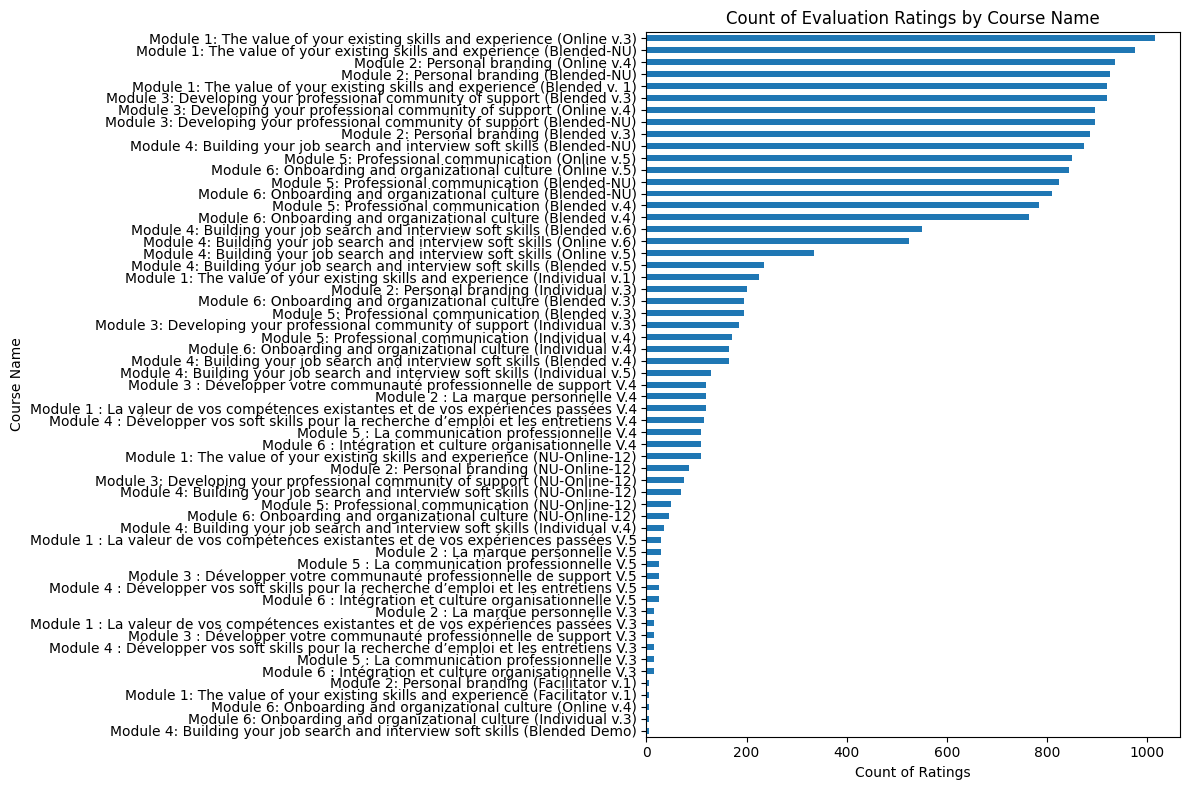

In [ ]:
rating_counts = df_Eval.groupby('Course Name')['Eval Rating'].value_counts().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
rating_counts.sum(axis=1).sort_values().plot(kind='barh')
plt.title('Count of Evaluation Ratings by Course Name')
plt.xlabel('Count of Ratings')
plt.ylabel('Course Name')
plt.tight_layout()
plt.show()


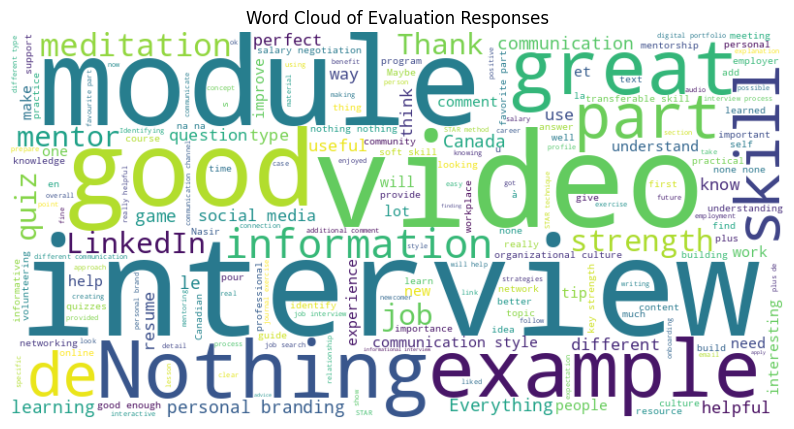

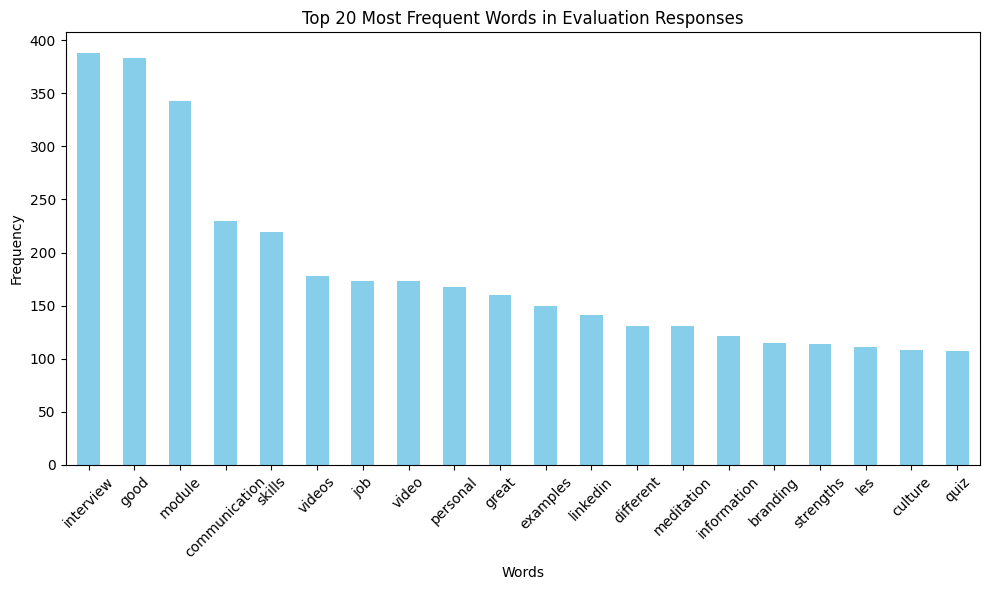

In [ ]:

# Assuming 'Eval Response' is the column containing evaluation responses
eval_responses = df_Eval['Eval Response'].dropna()

# Concatenate all responses into a single string
all_text = ' '.join(eval_responses)

# Generate a word cloud to visualize the most frequent words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Evaluation Responses')
plt.axis('off')
plt.show()

# Perform basic text analysis using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(eval_responses)

# Get the most frequent words
word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
top_words = word_freq.sum().sort_values(ascending=False).head(20)

# Plot the most frequent words
plt.figure(figsize=(10, 6))
top_words.plot(kind='bar', color='skyblue')
plt.title('Top 20 Most Frequent Words in Evaluation Responses')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**List of Questions**

In [ ]:
module1_df = df_Eval[df_Eval['Course Name'].str.contains('Module 1')]

module1_questions = module1_df['Eval Question'].unique()

print("Questions in Module 1:")
for question in module1_questions:
    print(question)



Questions in Module 1:
1. What is your overall rating for Module 1? 
3. What was your favourite part of Module 1?
2. If 1 star = 1 hour, how many hours did it take you to complete Module 1?
5. Please share any additional comments on Module 1
4. What would improve Module 1? 
1. What is your overall rating for Module 1?
4. Comment pourrions-nous améliorer le Module 1 ?
1. Quelle note globale donneriez-vous au Module 1 ?
3. Quelle a été votre partie favorite du Module 1 ?
5. N’hésitez pas à nous faire de tout autre commentaire sur le Module 1.
2. Si 1 étoile = 1 heure, combien d’heures vous ont été nécessaires pour terminer le Module 1 ?


In [ ]:
modules = ['Module 1', 'Module 2', 'Module 3', 'Module 4', 'Module 5', 'Module 6']

for module in modules:
    module_df = df_Eval[df_Eval['Course Name'].str.contains(module)]

    module_questions = module_df['Eval Question'].unique()

    print(f"Questions in {module}:")
    for question in module_questions:
        print(question)


Questions in Module 1:
1. What is your overall rating for Module 1? 
3. What was your favourite part of Module 1?
2. If 1 star = 1 hour, how many hours did it take you to complete Module 1?
5. Please share any additional comments on Module 1
4. What would improve Module 1? 
1. What is your overall rating for Module 1?
4. Comment pourrions-nous améliorer le Module 1 ?
1. Quelle note globale donneriez-vous au Module 1 ?
3. Quelle a été votre partie favorite du Module 1 ?
5. N’hésitez pas à nous faire de tout autre commentaire sur le Module 1.
2. Si 1 étoile = 1 heure, combien d’heures vous ont été nécessaires pour terminer le Module 1 ?
Questions in Module 2:
2. If 1 star = 1 hour, how many hours did it take you to complete Module 2?
5. Please share any additional comments on Module 2
4. What would improve Module 2? 
3. What was your favourite part of Module 2?
1. What is your overall rating for Module 2? 
1. Quelle note globale donneriez-vous au Module 2 ?
3. Quelle a été votre partie f

**Module1 Favourite part**

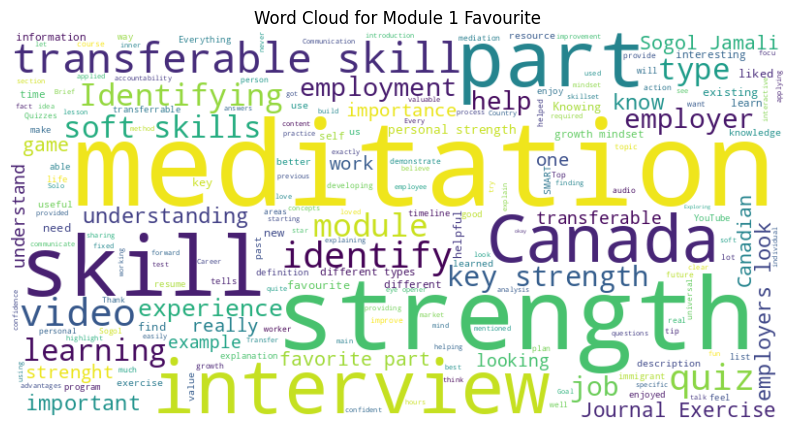

In [ ]:
module1_fav_df = df_Eval[df_Eval['Eval Question'] == '3. What was your favourite part of Module 1?']

module1_fav = module1_fav_df['Eval Response']
responses_text = ' '.join(module1_fav.dropna())

wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(responses_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Module 1 Favourite')
plt.axis('off')
plt.show()

In [ ]:
module1_favourite_df = df_Eval[df_Eval['Eval Question'] == '3. What was your favourite part of Module 1?']

module1_favourite_df = module1_favourite_df.dropna(subset=['Eval Response'])

module1_favourite = module1_favourite_df['Eval Response']

print(module1_favourite)

1                                    7 Transferable skills
35                                    Transferrable skills
66                                  “Transferable Skills” 
97                                             soft skills
127                           SELF STRENGTH AND MEDITATION
                               ...                        
18522                                               Part 1
18634               explanation of the types of employment
18661                                          meditation 
18751    The second part. It let me know exactly about ...
18807                       Identify your inner strengths.
Name: Eval Response, Length: 460, dtype: object


In [ ]:
module1_favourite_df = df_Eval[df_Eval['Eval Question'] == '3. What was your favourite part of Module 1?']
module1_favourite_df = module1_favourite_df.dropna(subset=['Eval Response'])
module1_favourite = module1_favourite_df['Eval Response']

# phrases to count
phrases_to_count = ['Transferable skills', 'Transferrable skills','soft skills', 'Meditation', 'quiz', 'key strengths', 'video','Interview']

# Function to clean and tokenize the responses
def clean_and_tokenize(response):
    response = response.lower()
    response = re.sub(r'[^a-zA-Z0-9\s]', '', response)
    words = response.split()
    return words

def detect_phrases(response):
    cleaned_response = clean_and_tokenize(response)
    detected_phrases = []
    for phrase in phrases_to_count:
        if re.search(r'\b{}\b'.format(re.escape(phrase.lower())), ' '.join(cleaned_response), re.IGNORECASE):
            detected_phrases.append(phrase)
    return detected_phrases if detected_phrases else 'None'

# Apply the detect_phrases function to each response in module1_favourite
module1_favourite_detected_phrases = module1_favourite.apply(detect_phrases)

module1_favourite_combined = pd.concat([module1_favourite, module1_favourite_detected_phrases], axis=1)
module1_favourite_combined.columns = ['Module1_Favourite_Response', 'Detected_Phrases']

print("Eval Response".ljust(50), "Detected Phrase")
for response, detected_phrases in zip(module1_favourite_combined['Module1_Favourite_Response'], module1_favourite_combined['Detected_Phrases']):
    print(response.ljust(50), detected_phrases)



Eval Response                                      Detected Phrase
7 Transferable skills                              ['Transferable skills']
Transferrable skills                               ['Transferrable skills']
“Transferable Skills”                              ['Transferable skills']
soft skills                                        ['soft skills']
SELF STRENGTH AND MEDITATION                       ['Meditation']
all part was okay                                  None
Meditation                                         ['Meditation']
All                                                None
quiz                                               ['quiz']
quiz                                               ['quiz']
Exploring my existing skills.                      None
Strengths that employers are looking for at Canada None
Interview                                          ['Interview']
The meditation tip.                                ['Meditation']
Meditation, transferable skills d

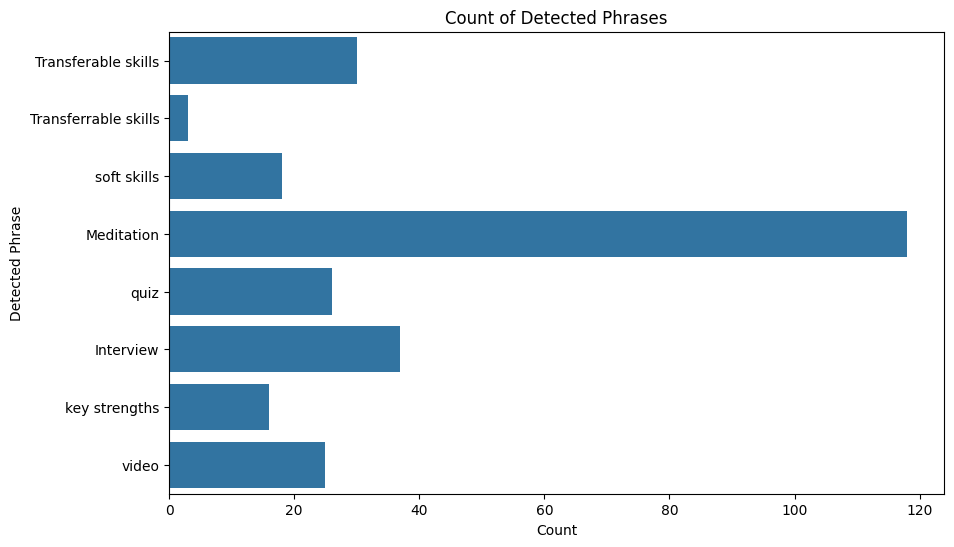

In [ ]:
detected_phrases_flat = [phrase for sublist in module1_favourite_combined['Detected_Phrases'] for phrase in sublist if phrase in ['Transferable skills', 'Transferrable skills','soft skills', 'Meditation', 'quiz', 'key strengths', 'video','Interview']]

phrase_counts = Counter(detected_phrases_flat)

phrase_counts_df = pd.DataFrame.from_dict(phrase_counts, orient='index').reset_index()
phrase_counts_df.columns = ['Detected_Phrase', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Detected_Phrase', data=phrase_counts_df)
plt.title('Count of Detected Phrases')
plt.xlabel('Count')
plt.ylabel('Detected Phrase')
plt.show()


**To Improve Module 1**

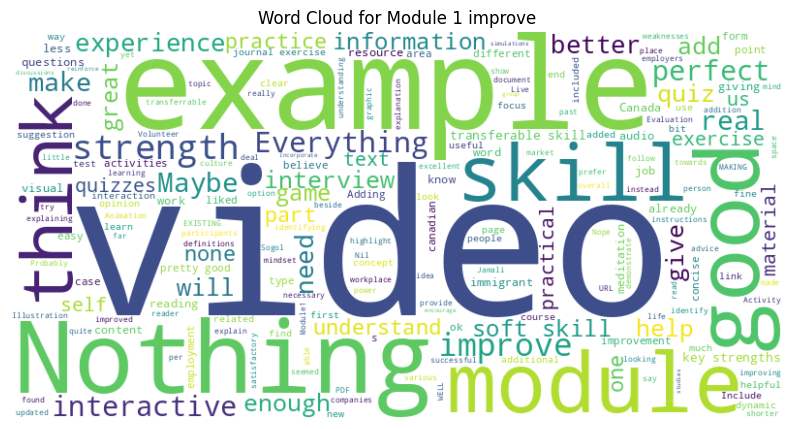

In [ ]:
module1_improve_df = df_Eval[df_Eval['Eval Question'] == '4. What would improve Module 1? ']

module1_improve = module1_improve_df['Eval Response']
responses_text = ' '.join(module1_improve.dropna())

wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(responses_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Module 1 improve')
plt.axis('off')
plt.show()


# Perform basic text analysis using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(responses_text)

# Get the most frequent words
word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
top_words = word_freq.sum().sort_values(ascending=False).head(20)

# Plot the most frequent words
plt.figure(figsize=(10, 6))
top_words.plot(kind='bar', color='skyblue')
plt.title('Top 20 Most Frequent Words in Evaluation Responses')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
module1_rating = df_Eval[df_Eval['Eval Question'] == '1. What is your overall rating for Module 1?']
